In [1]:
import pandas as pd
import numpy as np

In [118]:
recipe = pd.read_csv('./data/recipe_db.csv')

recipe['제목'][9]

'고소한 콩가루 스콘 ! 비건레시피, 노버터 스콘'

In [3]:
import urllib.request
from konlpy.tag import Okt
from konlpy.tag import Kkma
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
import nltk

In [5]:
recipe = pd.read_csv('./data/recipe_db.csv')
del recipe['id']
del recipe['팁']
recipe.describe()

,제목,설명
count,20807,20807
unique,19782,20210
top,오징어볶음,"재료 짜사이 150g, 대파 흰부분 1대, 고추기름 23작은술, 참기름 1작은술,..."
freq,6,4


In [49]:
kkma = Kkma()
result = []
for i in range(0, 100):
    tmp = kkma.sentences(recipe['설명'][i])
    for j in tmp:
        result.append([recipe['제목'][i], j])

In [48]:
tmp_df = pd.DataFrame(result, columns=['제목', '문장'])

In [21]:
f = open('./data/Recipe_Difficulty.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
data = []
for line in rdr:
    if len(line) != 3:
        print(line)
    #data.append(line)
    
#df = pd.DataFrame(data, columns=['제목','문장','난이도'])

['밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식', '오리고기 3 조각, 짜장 라면 1개, 물 300ml']
['밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식', '1인 분이라 3 조각씩 따로 소분해서 얼려 놓았던 오리고기를 해동시키고 나서 물 300ml 와 함께 밥솥에 넣어서 재가열 9분 해주세요.1']
['밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식', '고기를 완전히 익히기 위해 재가열 9분 끝난 후 다시 재가열 9분 해 주세요.2']
['아스파라거스 베이컨 말이', '재료 베이컨 15 장, 아스파라거스 굵은 거 15개 허니바사믹소스 버터 4 큰 술, 발사 믹 식초 16 큰 술, 꿀 2 큰 술,-1\n아스파라거스 베이컨 말이,Costco에서 구입한 요 베이컨은 그나마 짠맛이 덜해서 애정 애정 베이컨이 1 파운드 450g 한 팩에 15 장 들어 있으니 아스파라거스도 15개를 준비합니다.,-1\n아스파라거스 베이컨 말이,아스파라거스 끝 부분의 질긴 부분은 잘라 내고 아스파라거스에 베이컨을 돌돌 돌 말아 줍니다.,-1\n아스파라거스 베이컨 말이,살코기 부분이 밖으로 보이도록 위치를 잡아 주세요.,1\n아스파라거스 베이컨 말이,중불에 팬을 올리고 베이컨을 구워 줍니다.,2\n아스파라거스 베이컨 말이,아스파라거스는 그냥도 먹을 수 있으니 베이컨만 익히면 되요.,-1\n아스파라거스 베이컨 말이,베이컨이 익는 동안 허니 발사 믹 소스를 만들어 줍니다.,-1\n아스파라거스 베이컨 말이,버터 4 큰 술을 녹인 후 베이컨 말이 15개에 필요한 소스 재료 버터 4 큰 술 발사 믹 식초 16 큰 술 꿀 2 큰 술 발사 믹 식초 16 큰 술을 넣습니다.,1\n아스파라거스 베이컨 말이,소스가 바글바글 끓어 오르면 불을 끕니다.,2\n아스파라거스 베이컨 말이,꿀 2 큰 술을 넣고 잘 섞어 줍니다.,1\n아스파라거스 베이컨 말이,허니 발사 믹 소스 완성 노릇하게 구워 진 베이컨에 허니 발사 믹 소스를 골고루 끼얹어 주면 맛있는 아 스파라거스 베이컨 말이 완성,1\n아스파라거

In [136]:
f = open("./data/Recipe_Difficulty.csv", 'r', encoding='utf-8')
data = []
line = f.readline()
line = f.readline()
line = line.rstrip('\n')
for i in recipe['제목']:
    while True:
        if not line: break
        if line[-2:] == '-1':
            data.append([i, line[len(i) + 1:-3], -1])
        if line[-2:] != '-1' and int(line[-1:]) == 1:
            data.append([i, line[len(i) + 1:-2], 1])
        if int(line[-1:]) == 2:
            data.append([i, line[len(i) + 1:-2], 2])
        if int(line[-1:]) == 3:
            data.append([i, line[len(i) + 1:-2], 3]) 
        line = f.readline()
        line = line.rstrip('\n')
        if line[:len(i)] != i: break

f.close()

In [137]:
df = pd.DataFrame(data, columns=['제목','문장','난이도'])
df

,제목,문장,난이도
0,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장 라면에 오리고기가 잘 맞아요.,-1
1,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,오리 기름이 몸에 해롭지 않은 기름이고 오리고기가 몸에 열을 내는 성질이 있어 겨울...,-1
2,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,"""오리고기 3 조각, 짜장 라면 1개, 물 300ml""",-1
3,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,1인 분이라 3 조각씩 따로 소분해서 얼려 놓았던 오리고기를 해동시키고 나서 물 3...,1
4,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,고기를 완전히 익히기 위해 재가열 9분 끝난 후 다시 재가열 9분 해 주세요.,2
...,...,...,...
1204,찌망 요리레시피 간단한 청경채 된장무침!,청경 채 꼭 다리를 잘른 뒤 씻어 주세요.,1
1205,찌망 요리레시피 간단한 청경채 된장무침!,청경 채를 1 분간 데쳐 주세요.,2
1206,찌망 요리레시피 간단한 청경채 된장무침!,데친 청경 채는 바로 찬물에 행군 뒤 물기를 꼭 짜 주세요.,2
1207,찌망 요리레시피 간단한 청경채 된장무침!,양념에 무쳐 주세요.,1


In [139]:
df.to_csv('Recipe_Difficulty_label.csv', index=False, encoding='utf-8')

In [6]:
data = pd.read_csv('./Recipe_Difficulty_label.csv', index_col = 0)
data.head()

,문장,난이도
제목,,
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장 라면에 오리고기가 잘 맞아요.,-1
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,오리 기름이 몸에 해롭지 않은 기름이고 오리고기가 몸에 열을 내는 성질이 있어 겨울...,-1
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,"""오리고기 3 조각, 짜장 라면 1개, 물 300ml""",-1
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,1인 분이라 3 조각씩 따로 소분해서 얼려 놓았던 오리고기를 해동시키고 나서 물 3...,1
밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,고기를 완전히 익히기 위해 재가열 9분 끝난 후 다시 재가열 9분 해 주세요.,2


In [7]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '스푼', '큰술', '큰 술', '작은술', '작은 술', '숟갈', '조각', '종이컵', '컵', '그램', 'g', 'T', 'ml', 'L']

문장의 최대 길이 : 89
문장의 평균 길이 : 16.085194375516956


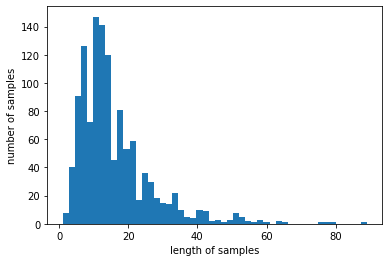

In [9]:
okt = Okt()
tokenized_data = []
for sentence in data['문장']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
print('문장의 최대 길이 :',max(len(l) for l in tokenized_data))
print('문장의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
model = Word2Vec.load('recipe_word2vec.model')

In [27]:
word_vectors = model.wv
word_vectors['짜장']

array([ 1.8449643e-01, -7.1226221e-01,  5.5247527e-01, -3.3808935e-01,
        4.4456640e-01, -1.6553593e+00, -9.8364020e-04,  3.0955803e-01,
       -1.0937968e+00,  8.1932902e-01, -5.8290076e-01, -4.4559979e-01,
       -1.0513530e+00,  4.0536839e-01, -1.3926753e+00, -1.4401121e+00,
        4.7675976e-01, -2.5629058e+00,  2.6465169e-01,  2.0202754e+00,
        1.0296969e+00, -6.3706493e-01, -1.4217857e+00,  1.5535733e+00,
        8.8328600e-02, -9.1677986e-02, -1.9614914e-01,  4.0195870e-01,
       -6.6355010e-03, -2.5469014e-01, -1.3132311e-01, -7.2256380e-01,
       -1.5640676e+00, -1.5567385e-01, -1.7961173e+00, -2.1227610e+00,
       -2.1390035e+00,  1.9869254e+00,  3.5836196e-01,  1.6683100e+00,
       -3.6288792e-01,  1.3850271e+00, -2.9231012e+00,  8.4213518e-02,
        1.0157565e+00,  7.6235883e-02, -5.7956165e-01,  1.5484311e-01,
        6.9155383e-01, -1.5720685e+00,  1.1404674e+00,  1.2187593e+00,
       -5.6129211e-01, -6.0349584e-01,  1.8859159e+00, -1.0264020e+00,
      

In [32]:
tmp = []
cnt = 1
for i in tokenized_data:
    sentence_word2vec = np.array([0.0]*100)
    for j in i:
        try:
            sentence_word2vec += np.array(word_vectors[j])
        except:
            print(j + ' is not in vector')
        if cnt % 10000 == 0:
            print(cnt," 번째 실행")
        cnt+=1
    tmp.append(sentence_word2vec)

" is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
천기 is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
" is not in vector
" is not in vector
" is not in vector
" is not in vector
" is not in vector
" is not in vector
" is not in vector
Costco is not in vector
." is not in vector
" is not in vector
발사 is not in vector
Costco is not in vector
발사 is not in vector
발사 is not in vector
발사 is not in vector
발사 is not in vector
발사 is not in vector
라거 is not in vector
흡족 is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
" is not in vector
." is not in vector
짭쪼 is not in vector
시피 is not in vector
" is not in vector
시피 is not in vector
." is not in vector
시피 is not in vector
시피 is not in vector
시피 is not in vector
" is not in vector
시피 is not in 

In [129]:
tmp = pd.DataFrame(tmp)
tmp

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.117841,1.270284,1.653114,-2.336392,3.059244,-1.476635,5.115969,-1.315182,0.343478,-1.230774,...,6.735312,3.487270,6.567747,2.418165,8.372972,-0.362782,1.206875,-1.678782,3.048027,1.118359
1,-6.850872,-1.607350,-3.734941,-4.058874,1.818428,-2.691611,2.548544,7.943604,1.971583,-0.863966,...,3.715602,-20.593108,-17.321415,-6.433086,1.511655,-12.094937,8.294989,-10.132945,2.198505,4.132156
2,13.289144,-7.052340,5.465607,1.488398,2.661223,-0.103941,-7.956881,-5.257511,-7.166437,-10.122082,...,11.922551,12.655905,10.415291,2.927971,3.043477,1.936602,3.669615,18.682595,-1.599310,-9.117172
3,-0.297643,-8.829227,1.212746,3.035149,-7.456712,10.656580,4.055322,-9.544472,9.615657,4.932350,...,2.528612,4.991562,3.889505,7.817073,9.102918,13.050100,12.929065,5.702399,0.037739,-6.528285
4,-4.716516,-9.181742,-2.608997,8.145539,3.640190,11.503717,1.571675,-6.313730,4.658181,8.596712,...,9.932857,7.115105,-8.647731,-1.336599,8.566169,8.720460,3.988520,6.399834,-5.267698,8.431443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.421349,-5.652288,7.057841,2.397019,0.013661,0.815967,-3.373729,-3.802599,6.412266,10.018681,...,6.159874,5.105500,-7.449384,7.372715,4.465205,8.996538,-0.578945,-3.630156,-8.318815,7.471295
1205,5.746950,-9.573744,6.744369,-1.499197,-2.219919,4.439781,-0.840605,-2.847051,6.406940,6.493499,...,3.678620,1.110993,1.763609,11.497338,7.802653,-0.635231,3.756175,6.243492,-5.482014,6.906276
1206,2.664681,-5.135295,2.315754,-5.089152,-2.003259,1.129202,6.468753,-7.184628,0.911453,8.427743,...,9.414759,4.904554,-4.764855,6.557099,15.123081,5.700845,11.813444,-0.080018,-9.657785,15.037652
1207,4.993124,-5.943595,5.274572,-5.980007,-3.622379,-1.257523,6.791638,-1.158510,5.144585,8.352207,...,6.193248,2.600859,0.800820,2.194331,3.423025,0.244789,5.676318,-3.771485,-0.746809,4.236433


In [160]:
X = tmp
Y = data['난이도']

X = X.values
Y = Y.values
#X = pd.DataFrame(X)
#Y = pd.DataFrame(Y)

array([-1, -1, -1, ...,  2,  1, -1], dtype=int64)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
params = {'learning_rate': 0.01,
         'max_depth': 16,
         'boosting': 'gdbt',
         'objective': 'binary',
         'metric': 'binary_logloss',
         'is_training_metric': True,
         'num_leaves': 144,
         'feature_fraction': 0.9,
         'bagging_fraction': 0.7,
         'bagging_freq': 5,
         'seed': 2020}

In [163]:
from lightgbm import LGBMClassifier, plot_importance
lgbm = LGBMClassifier(n_estimators=200)

evals = [(X_test, Y_test)]
lgbm.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric = 'binary_logloss', eval_set = evals, verbose=True)

[1]	valid_0's multi_logloss: 1.11212
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.05828
[3]	valid_0's multi_logloss: 1.01015
[4]	valid_0's multi_logloss: 0.968647
[5]	valid_0's multi_logloss: 0.93165
[6]	valid_0's multi_logloss: 0.898118
[7]	valid_0's multi_logloss: 0.867942
[8]	valid_0's multi_logloss: 0.839654
[9]	valid_0's multi_logloss: 0.820107
[10]	valid_0's multi_logloss: 0.798019
[11]	valid_0's multi_logloss: 0.777274
[12]	valid_0's multi_logloss: 0.764006
[13]	valid_0's multi_logloss: 0.749297
[14]	valid_0's multi_logloss: 0.737507
[15]	valid_0's multi_logloss: 0.725225
[16]	valid_0's multi_logloss: 0.716091
[17]	valid_0's multi_logloss: 0.708347
[18]	valid_0's multi_logloss: 0.702349
[19]	valid_0's multi_logloss: 0.69508
[20]	valid_0's multi_logloss: 0.689289
[21]	valid_0's multi_logloss: 0.682534
[22]	valid_0's multi_logloss: 0.677195
[23]	valid_0's multi_logloss: 0.670417
[24]	valid_0's multi_logloss: 0.665526
[25]	valid_0's m

LGBMClassifier(n_estimators=200)

In [168]:
lgb_pred = lgbm.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion = confusion_matrix(Y_test, lgb_pred)
accuracy = accuracy_score(Y_test, lgb_pred)

print('오차행렬:\n', confusion)

print('\n정확도: {:.4f}'.format(accuracy))

오차행렬:
 [[112   3   5   0]
 [ 11  29   7   1]
 [  4   8  46   2]
 [  2   2   9   1]]

정확도: 0.7769
